In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading data from the csv file
df = pd.read_csv(r'C:\DataScience\Workspace\project1_employee.csv',parse_dates=['Hire_Date'],
    dayfirst=True)

In [3]:
# checking quality of data
print(df.head(10))
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())   # no null values 
print(df.duplicated().sum())# no duplicates are present




   Employee_ID        Department  Gender  Age   Job_Title  Hire_Date  \
0            1                IT    Male   55  Specialist 2022-01-19   
1            2           Finance    Male   29   Developer 2024-04-18   
2            3           Finance    Male   55  Specialist 2015-10-26   
3            4  Customer Support  Female   48     Analyst 2016-10-22   
4            5       Engineering  Female   36     Analyst 2021-07-23   
5            6                IT    Male   43     Manager 2016-08-14   
6            7                IT    Male   37  Technician 2023-08-28   
7            8       Engineering  Female   55    Engineer 2014-10-27   
8            9         Marketing  Female   55  Technician 2023-06-29   
9           10       Engineering  Female   45  Consultant 2016-12-23   

   Years_At_Company Education_Level  Performance_Score  Monthly_Salary  \
0                 2     High School                  5            6750   
1                 0     High School                  5     

CONCLUSION:
1)Data is clean
2)no missing data
3)no duplicates
4)no wrong format

<h1> Correlation matrix<h1>

In [1]:

correlation_map=df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_map, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

# Show the plot
plt.show()

NameError: name 'df' is not defined

Conclusion: There is a correlation only between Performance_Score and Monthly_Salary. Since Underpaid and Satisfaction_Group are not part of the original dataset but were derived for analysis, the correlations involving these features are insignificant.

<h1>Are high-performing employees paid more?

In [5]:
performance_salary = df.groupby(['Department','Performance_Score'])['Monthly_Salary'].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))
print(performance_salary)
print(df['Performance_Score'].corr(df['Monthly_Salary']))

Department        Performance_Score
Customer Support  5                    7428.893905
                  4                    6884.905660
                  3                    6397.552762
                  2                    5896.739130
                  1                    5418.482143
Engineering       5                    7387.004405
                  4                    6903.031716
                  3                    6383.468468
                  2                    5925.756187
                  1                    5438.060748
Finance           5                    7364.573786
                  4                    6903.448276
                  3                    6431.137725
                  2                    5925.417917
                  1                    5414.276199
HR                5                    7370.311070
                  4                    6896.379468
                  3                    6441.874716
                  2                    5867.97

Text(0.5, 1.0, 'Average Salary by Department and Performance Score')

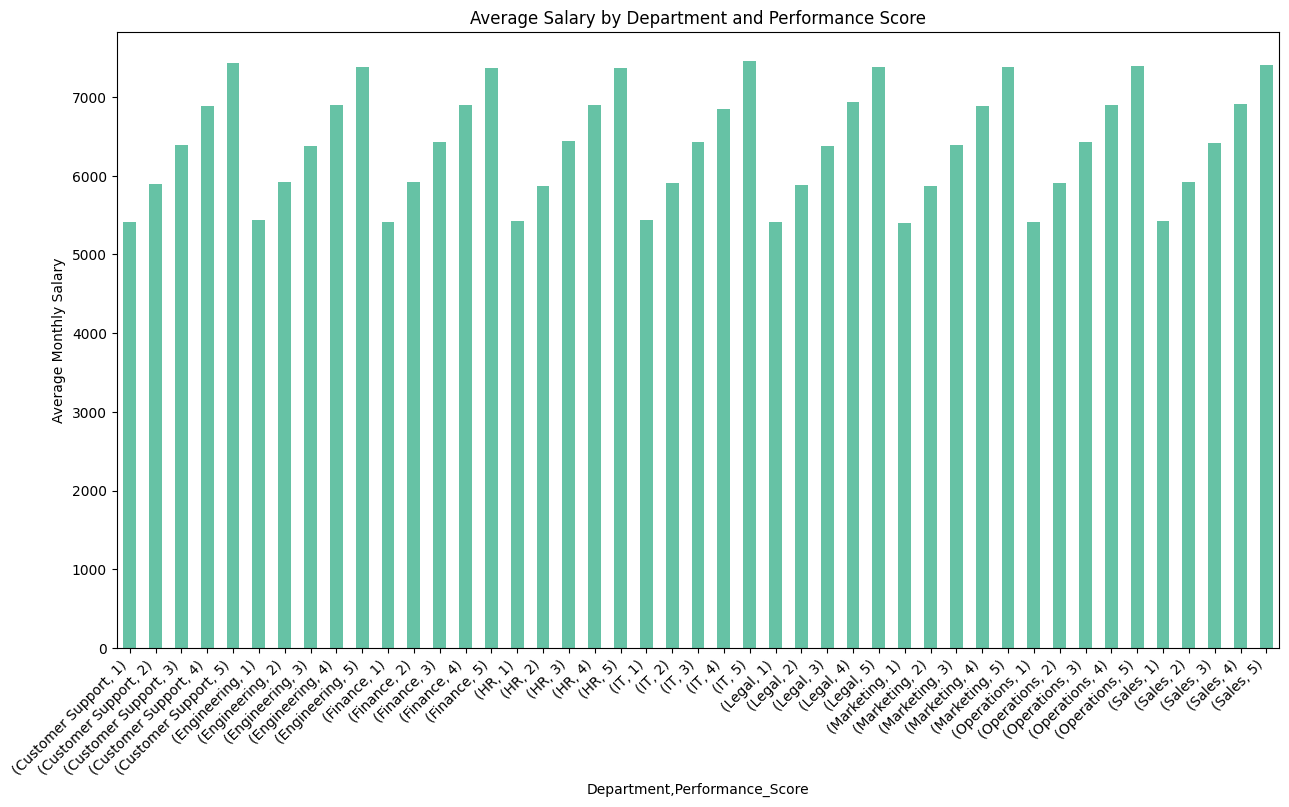

In [6]:
performance_salary = df.groupby(['Department','Performance_Score'])['Monthly_Salary'].mean()
plt.figure(figsize=(15, 10))

# performance_salary.plot(kind='bar')
ax = performance_salary.plot(kind='bar', figsize=(15, 8), colormap='Set2') 

plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Monthly Salary")
plt.title("Average Salary by Department and Performance Score")

conclusion:High performing employees are paid more accross all department

<h1>How does Monthly Salary vary by Education Level and Department?

In [7]:
# def mean_no_outliers(values):
#     lower = values.quantile(0.1)
#     upper = values.quantile(0.9)
#     filtered = values[(values >= lower) & (values <= upper)]
#     return filtered.mean()

In [8]:
sal_edu_dep_pivot = df.pivot_table(index='Education_Level', columns='Department', values='Monthly_Salary', aggfunc='mean',sort=True)


print(sal_edu_dep_pivot)

Department       Customer Support  Engineering      Finance           HR  \
Education_Level                                                            
Bachelor              6409.252863  6435.616191  6388.117200  6387.511239   
High School           6395.744999  6405.163297  6401.313102  6407.951733   
Master                6415.602837  6357.743902  6427.155689  6425.558313   
PhD                   6365.331010  6478.571429  6399.825784  6411.621622   

Department                IT        Legal    Marketing   Operations  \
Education_Level                                                       
Bachelor         6407.299671  6383.035714  6354.977659  6414.805565   
High School      6410.275362  6370.157926  6412.503704  6397.718403   
Master           6441.478314  6443.851230  6369.356760  6447.360617   
PhD              6433.304498  6450.606061  6422.574956  6368.369176   

Department             Sales  
Education_Level               
Bachelor         6405.691273  
High School      6393.3

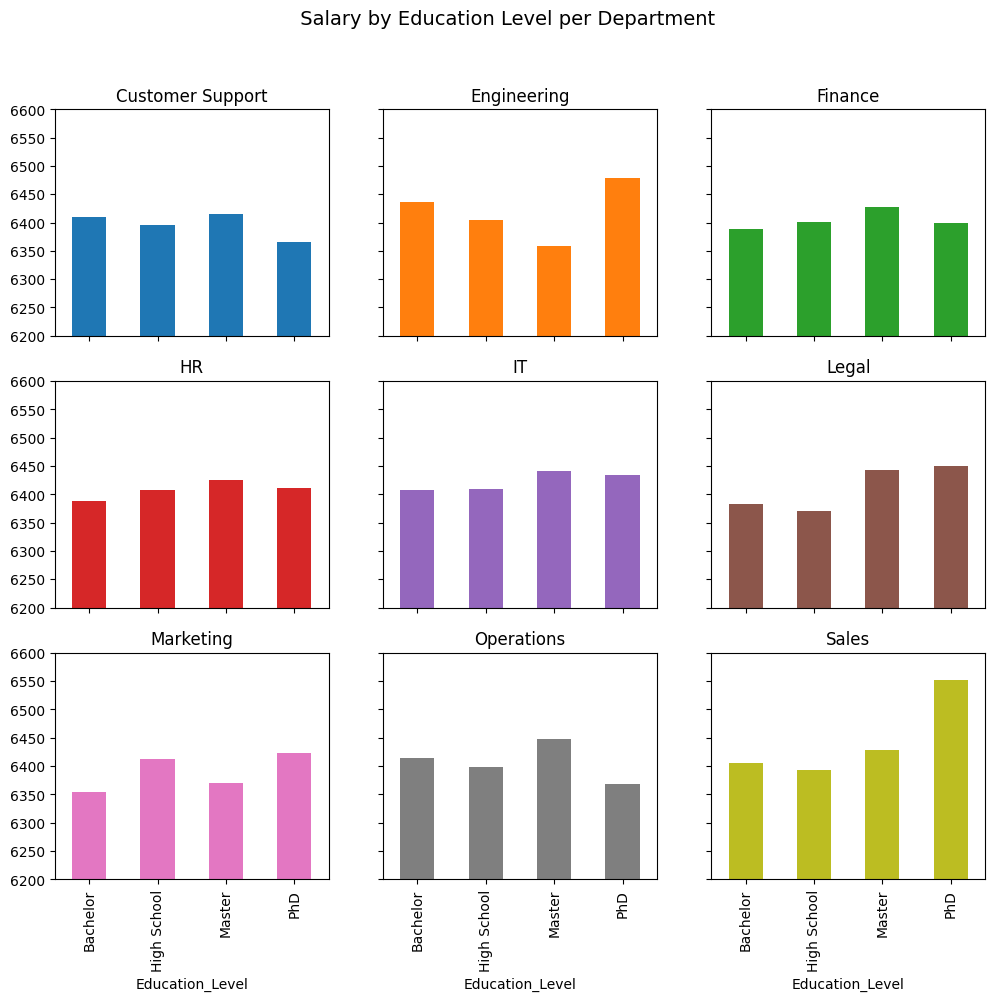

In [9]:
# import matplotlib.pyplot as plt

# # Simple subplot for each department
# sal_edu_dep_pivot.plot(kind='bar', subplots=True, layout=(3, 3), figsize=(12, 10),legend=False, sharey=True)

# plt.suptitle('Average Salary by Education Level per Department (Outliers Removed)', fontsize=14)
# # plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
# plt.show()
# import matplotlib.pyplot as plt
# Normalize the pivot table (row-wise for each department/column)
# normalized_pivot = sal_edu_dep_pivot.copy()

# for col in normalized_pivot.columns:
#     col_min = normalized_pivot[col].min()
#     col_max = normalized_pivot[col].max()
#     normalized_pivot[col] = (normalized_pivot[col] - col_min) / (col_max - col_min)

sal_edu_dep_pivot.plot(
kind='bar',
subplots=True,
layout=(3, 3),  # Adjust to your number of departments
figsize=(12, 10),
sharey=True,   # Now this makes sense—range is [0,1]
legend=False,
ylim=(6200,6600)

)
plt.suptitle(' Salary by Education Level per Department', fontsize=14)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Conclusion: There is no clear or consistent relationship between education level and salary. Salary does not appear to increase or decrease systematically with changes in education level.

<h1> Age distribution across departments

In [10]:
import numpy as np
def range1(values):
    u=values.max()
    l=values.min()
    range=u-l
    return range
x=df.groupby('Department')['Age'].agg([ 'mean', 'min', 'max',range1])
print(x)

                       mean  min  max  range1
Department                                   
Customer Support  40.948003   22   60      38
Engineering       41.122216   22   60      38
Finance           41.020357   22   60      38
HR                40.984033   22   60      38
IT                41.077891   22   60      38
Legal             40.982101   22   60      38
Marketing         41.127764   22   60      38
Operations        41.118862   22   60      38
Sales             40.882845   22   60      38


Conclusion: The average age of employees across all departments is remarkably consistent, hovering around 41 years. Additionally, all departments share the same age range (22 to 60), indicating uniform age distribution in hiring practices.

<h1>Do underpaid employees have lower satisfaction scores?

In [11]:
df['Satisfaction_Group'] = np.floor(df['Employee_Satisfaction_Score']).astype(int)
#floor rounding employee satisfication to just 5 categories

In [12]:
df['Underpaid'] = df['Monthly_Salary'] < df.groupby(['Department', 'Job_Title'])['Monthly_Salary'].transform('mean')
#create a new column 'Underpaid' to indicate if an employee is underpaid compared to their department and job title average salary



In [13]:
under_paid_pivot=df.pivot_table(
    index='Satisfaction_Group',
    columns='Underpaid',
    aggfunc='size'
)
print(under_paid_pivot)

Underpaid           False  True 
Satisfaction_Group              
1                   12621  12032
2                   13102  12206
3                   12664  12380
4                   12799  12091
5                      55     50


<Axes: title={'center': 'Satisfaction Score by Underpaid Status'}, xlabel='Satisfaction_Group'>

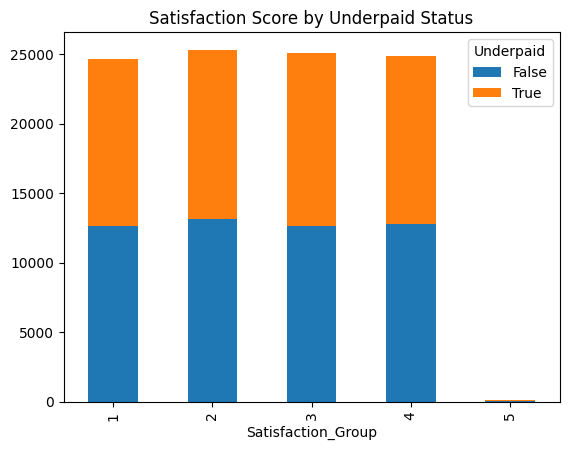

In [14]:
under_paid_pivot.plot(kind='bar',stacked='true', title="Satisfaction Score by Underpaid Status")


Conclusion:There is no strong correlation between underpayment and satisfaction levels

Are salaries aligned with experience (Years_At_Company)?

<Axes: xlabel='Years_At_Company', ylabel='Monthly_Salary'>

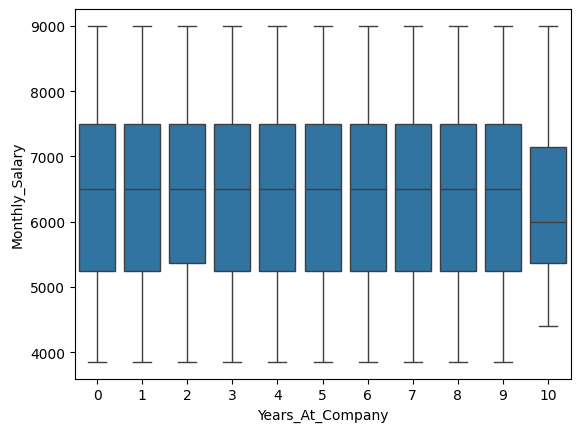

In [15]:
import seaborn as sns
sns.boxplot(x='Years_At_Company', y='Monthly_Salary', data=df)


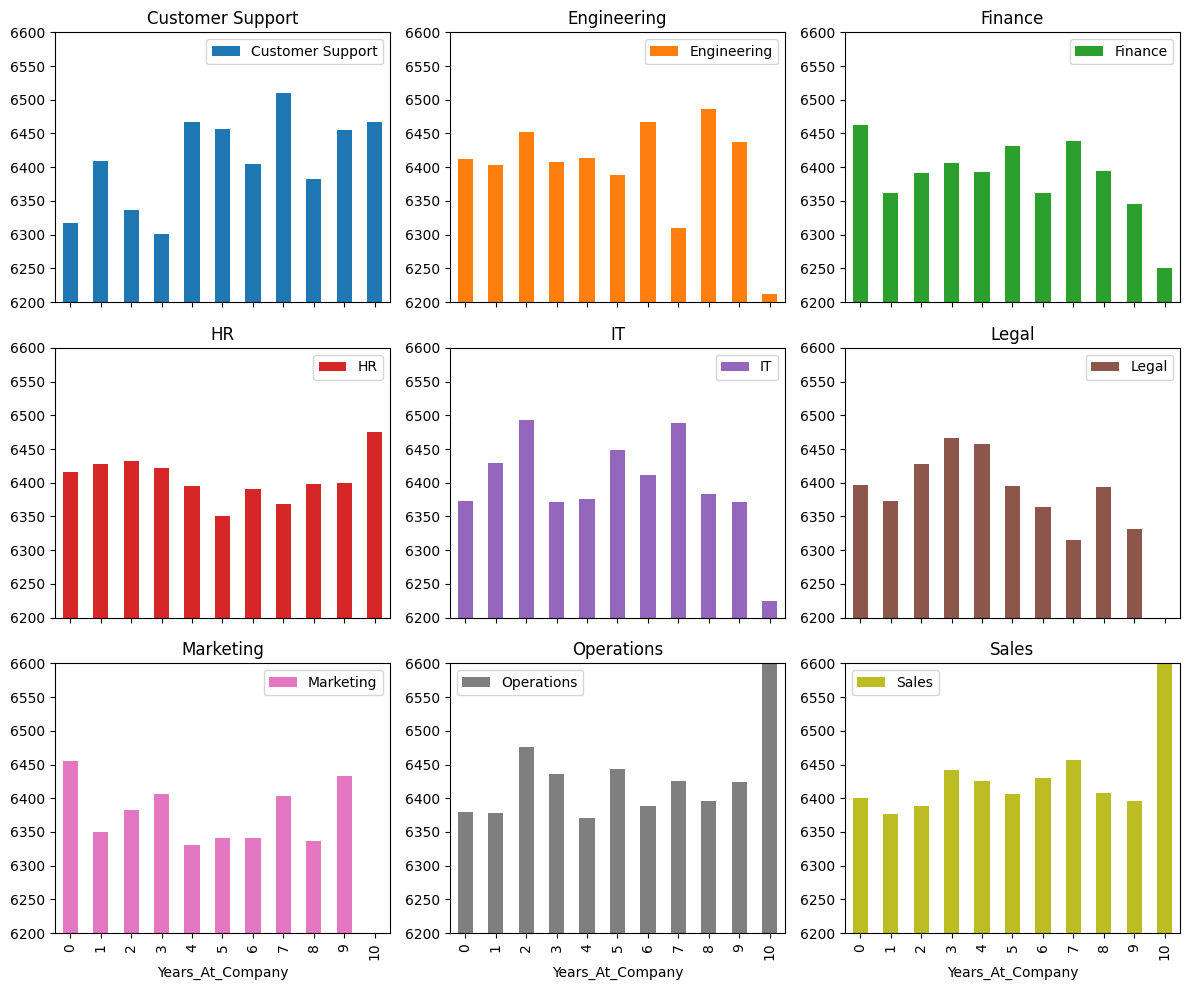

In [16]:
# Pivot: Mean Monthly Salary by Department and Years
mean_salary_department_pivot = df.pivot_table(
    index='Years_At_Company',
    columns='Department',
    values='Monthly_Salary',
    aggfunc='mean'
)

# Plot the pivoted data (bar or line plot)
mean_salary_department_pivot.plot(kind='bar',subplots=True, layout=(3, 3), figsize=(12, 10), sharey=False,ylim=(6200,6600))

plt.tight_layout()
plt.show()


Conclusion:The boxplot indicates that monthly salary remains relatively consistent across different years at the company, with no clear upward trend. The slight dip at the 10-year mark is likely due to the smaller number of employees with such long tenure.

The departmental breakdown shows no consistent pattern of salary growth with years at the company across different departments. Variations suggest that salary progression is influenced more by department-specific policies or roles rather than tenure alone

<h1>Are hiring patterns consistent across years, or do some years show irregular behavior?

Hire_Month  Hire_Year
January     2015         846
            2016         821
            2017         848
            2018         837
            2019         800
                        ... 
December    2019         805
            2020         804
            2021         905
            2022         845
            2023         858
Length: 121, dtype: int64


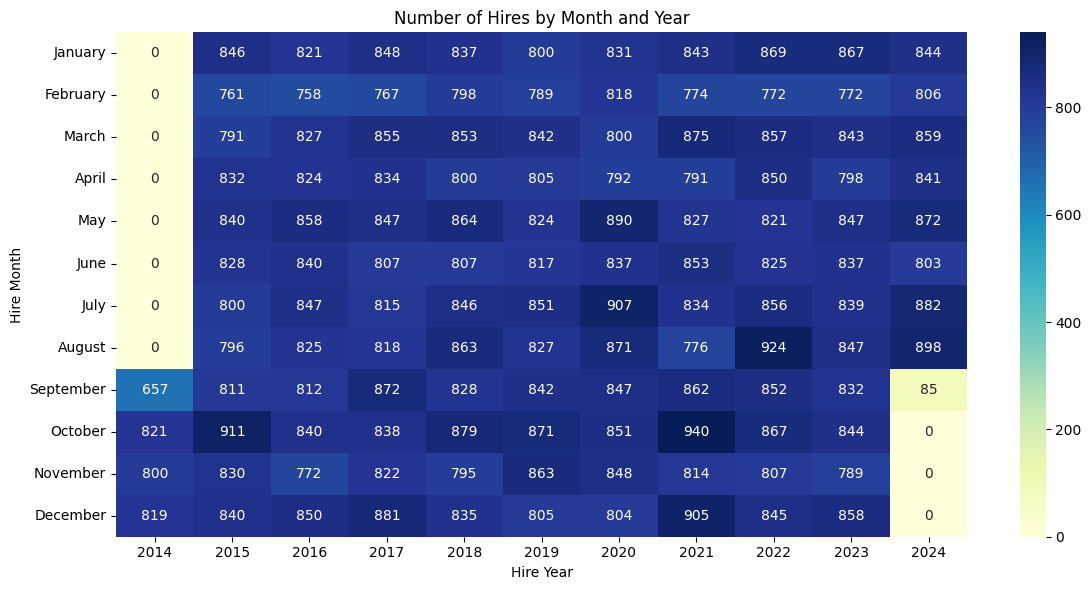

In [17]:

df['Hire_Month']=df['Hire_Date'].dt.month_name()
df['Hire_Year']=df['Hire_Date'].dt.year
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df['Hire_Month'] = pd.Categorical(df['Hire_Month'], categories=month_order, ordered=True)
# df['Hire_Month']
x=df.groupby(['Hire_Month','Hire_Year'],observed=True).agg('size')
print(x)
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame and pivot for heatmap
hire_counts = x.unstack(fill_value=0)  # This line is used to convert a multi-index Series (from a groupby) into a DataFrame



plt.figure(figsize=(12, 6))
sns.heatmap(hire_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Hires by Month and Year')
plt.xlabel('Hire Year')
plt.ylabel('Hire Month')
plt.tight_layout()
plt.show()


Conclusion:The heatmap reveals that hiring was consistently distributed across most months and years, with peaks in October 2021 and August 2022. Hiring activity in 2024 appears incomplete, as only data from earlier months is present.

<h1>Who is resigning , new employees?

Resigned          False  True 
Years_At_Company              
0                  9096    987
1                  8972   1046
2                  9284    988
3                  8910   1025
4                  9095   1008
5                  8921    971
6                  9087    981
7                  8900    992
8                  8905   1056
9                  8783    949
10                   37      7


<Axes: title={'center': 'year at company vs resigned'}, xlabel='Years_At_Company'>

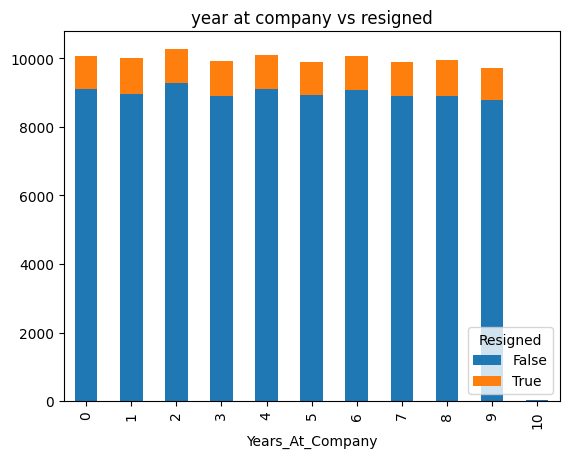

In [18]:
years_resign_pivot=df.pivot_table(
    index='Years_At_Company',
    columns='Resigned',
    aggfunc='size'
)
print(years_resign_pivot)
years_resign_pivot.plot(kind='bar',stacked='true',title='year at company vs resigned')

Conclusion:The plot shows that the number of resignations remains fairly consistent across different years at the company, with only slight variations. This suggests that tenure does not significantly affect the likelihood of an employee resigning.

<h1>How does the resignation rate and cumulative employee retention vary based on the number of years employees have spent at the company?

In [19]:

resigned_percentage=[]
total_working = 0 
total_employees = []
cumulative_working_employees = []
df['Years_At_Company'] = 2024 - df['Hire_Date'].dt.year


for i in range(0,11):
    x=df[(df['Years_At_Company']==i)&(df['Resigned']==True)]
    y=df[(df['Years_At_Company']==i)&(df['Resigned']==False)]
# resigned_ten_years_df=df[(df['Years_At_Company']==1)&(df['Resigned']==True)]
    print(f"years at company = {i},resigned employee = {x.shape[0]}")
    print(f"years at company = {i},retained employee = {y.shape[0]}")
    
    resigned_count = x.shape[0]
    retained_count = y.shape[0]
    total_yearly = resigned_count + retained_count
   
    resignation_pct = (resigned_count / total_yearly) * 100
    resigned_percentage.append(resignation_pct)
    # current_year = 2024
    # hired_years_ago = df[df['Hire_Date'].dt.year == current_year - i]
    
    hired_years_ago = df[df['Years_At_Company'] == i]
    total_working += retained_count
    cumulative_retained = df[(df['Years_At_Company'] <= 10-i) & (df['Resigned'] == False)].shape[0]
    total_employees.append(cumulative_retained)
    print(f"Cumulative total working up to {i} years ago (i.e., in year {2024 - i}): {cumulative_retained}")


    print(f"percentage of resigning --->{resignation_pct}")
    print(f"hired  {i} years ago --->{len(hired_years_ago)}\n")
    # print(f"{len(hired_years_ago)+retained_count-resigned_count}\n")
    

    

years at company = 0,resigned employee = 682
years at company = 0,retained employee = 6208
Cumulative total working up to 0 years ago (i.e., in year 2024): 89990
percentage of resigning --->9.898403483309144
hired  0 years ago --->6890

years at company = 1,resigned employee = 1043
years at company = 1,retained employee = 8930
Cumulative total working up to 1 years ago (i.e., in year 2023): 87207
percentage of resigning --->10.458237240549483
hired  1 years ago --->9973

years at company = 2,resigned employee = 997
years at company = 2,retained employee = 9148
Cumulative total working up to 2 years ago (i.e., in year 2022): 78281
percentage of resigning --->9.827501232134056
hired  2 years ago --->10145

years at company = 3,resigned employee = 1011
years at company = 3,retained employee = 9083
Cumulative total working up to 3 years ago (i.e., in year 2021): 69465
percentage of resigning --->10.015851000594413
hired  3 years ago --->10094

years at company = 4,resigned employee = 992
y

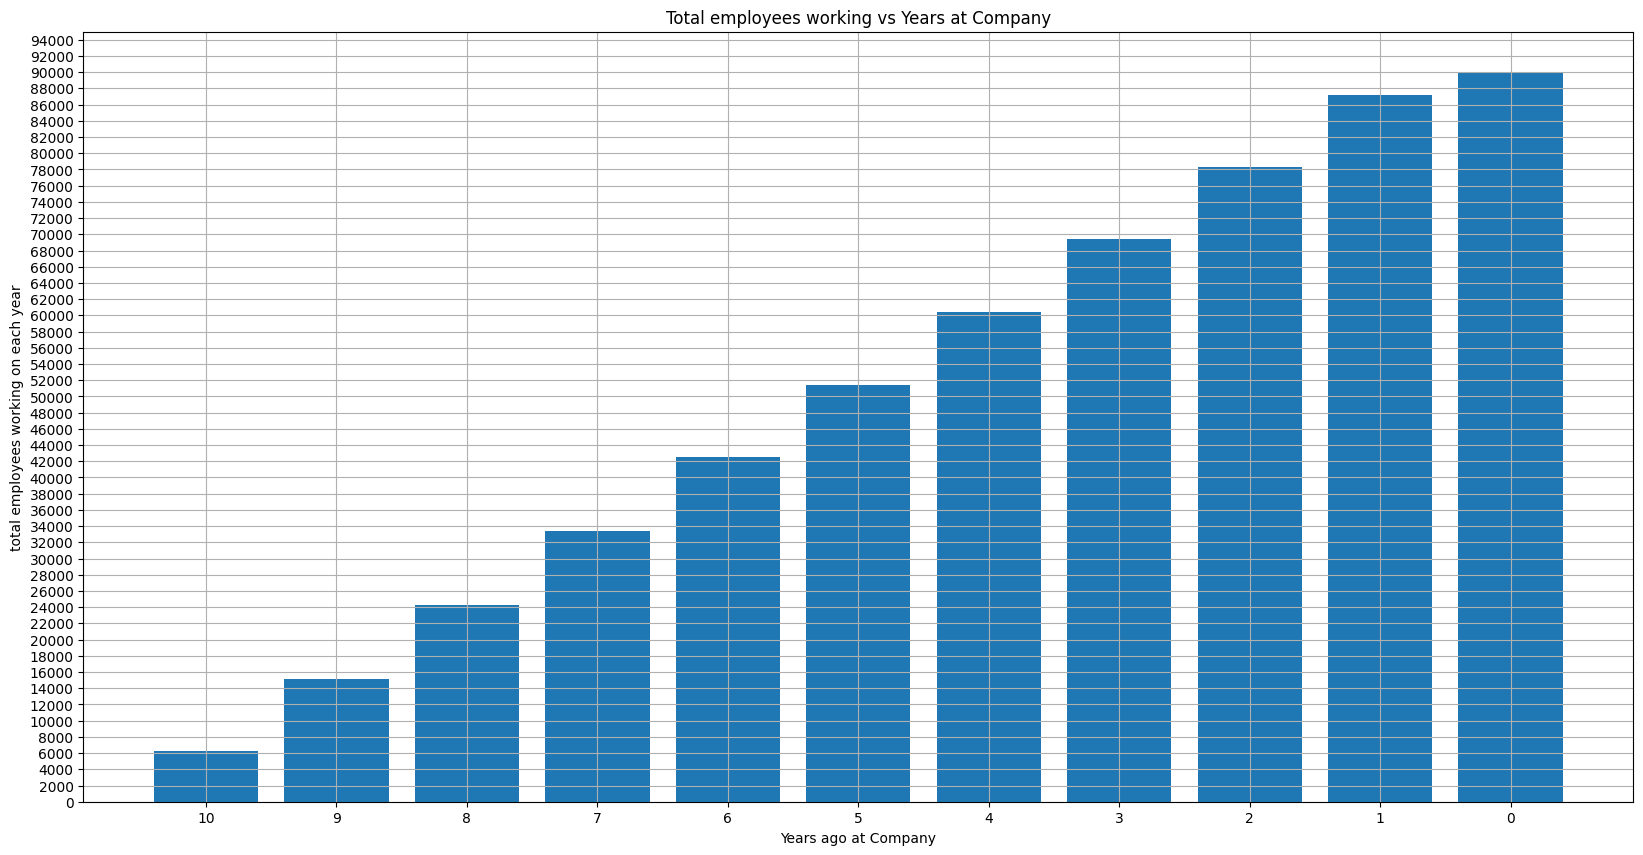

In [20]:
import matplotlib.pyplot as plt

years = list(range(0, 11))
plt.figure(figsize=(20,10))
plt.bar(years, total_employees)

plt.title("Total employees working vs Years at Company")
plt.xlabel("Years ago at Company")
plt.ylabel("total employees working on each year")
plt.grid(True)
plt.xticks(years)

plt.ylim(0, max(total_employees) + 5000)
plt.yticks(range(0, max(total_employees) + 5000, 2000))
plt.gca().invert_xaxis()


plt.show()



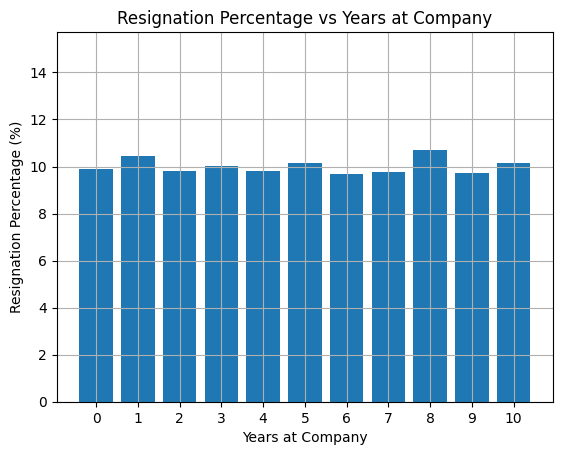

In [21]:
import matplotlib.pyplot as plt

years = list(range(0, 11))

plt.bar(years, resigned_percentage)

plt.title("Resignation Percentage vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Resignation Percentage (%)")
plt.grid(True)
plt.xticks(years)
plt.ylim(0, max(resigned_percentage) + 5)

plt.show()



Conclusion:The resignation rate remains fairly consistent around 10% across all years of service, indicating stable employee attrition regardless of tenure. The cumulative number of employees retained increases year over year, indicating consistent workforce growth and retention over the last 10 years. This upward trend reflects both steady hiring and relatively stable resignation rates across all tenure levels.

<h1>Is there a gender pay gap across departments?

In [22]:
gender_pay_pivot=df.pivot_table(
    index='Department',
    columns='Gender',
    values='Monthly_Salary',
    aggfunc='mean'
)
print(gender_pay_pivot)

Gender                 Female         Male        Other
Department                                             
Customer Support  6422.318702  6390.493985  6344.487179
Engineering       6441.365462  6393.481957  6416.474654
Finance           6392.975283  6399.738269  6449.468085
HR                6404.695817  6402.805976  6325.991649
IT                6417.873942  6403.084234  6513.222222
Legal             6395.806332  6378.665911  6490.705882
Marketing         6378.136001  6376.370054  6392.775229
Operations        6381.428307  6445.448586  6389.189189
Sales             6412.100372  6414.607695  6408.522727


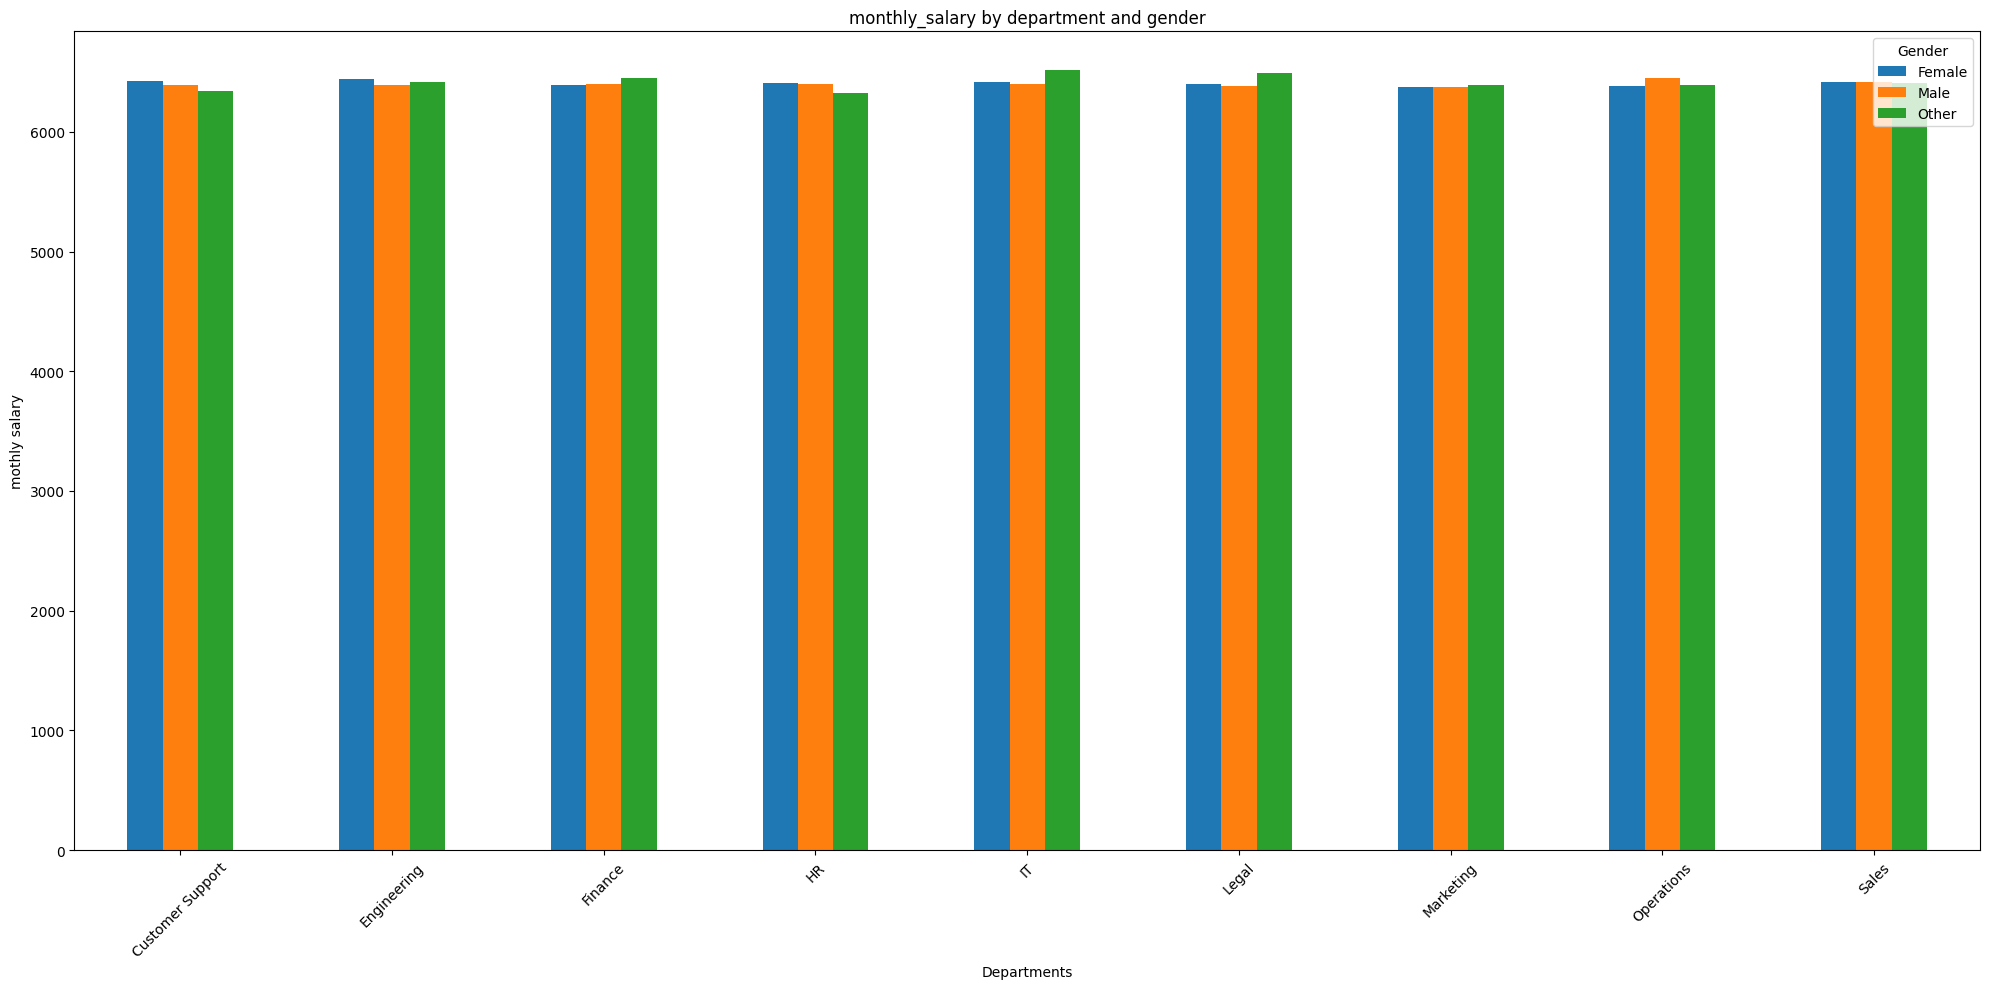

In [23]:

# axes=gender_pay_pivot.plot(kind='line', figsize=(20, 10),marker='o')
# for axes_row in axes:
#     for ax in axes_row:
#         ax.tick_params(axis='x',rotation=45)
gender_pay_pivot.plot(kind='bar', figsize=(20, 10))
plt.xticks(rotation=45)
plt.title('monthly_salary by department and gender')
plt.xlabel('Departments')
plt.ylabel('mothly salary')
plt.tight_layout()
plt.show()


In [24]:
df.groupby(['Gender'])['Monthly_Salary'].mean()


Gender
Female    6404.986354
Male      6400.481980
Other     6414.768145
Name: Monthly_Salary, dtype: float64

Conclusion:Across all departments, the monthly salary distribution is fairly consistent among different gender groups, indicating minimal gender-based pay disparity. Minor variations exist, but no department shows significant bias in salary based on gender.

<h1>Gender distribution on department

<Axes: xlabel='Department', ylabel='Number of employees'>

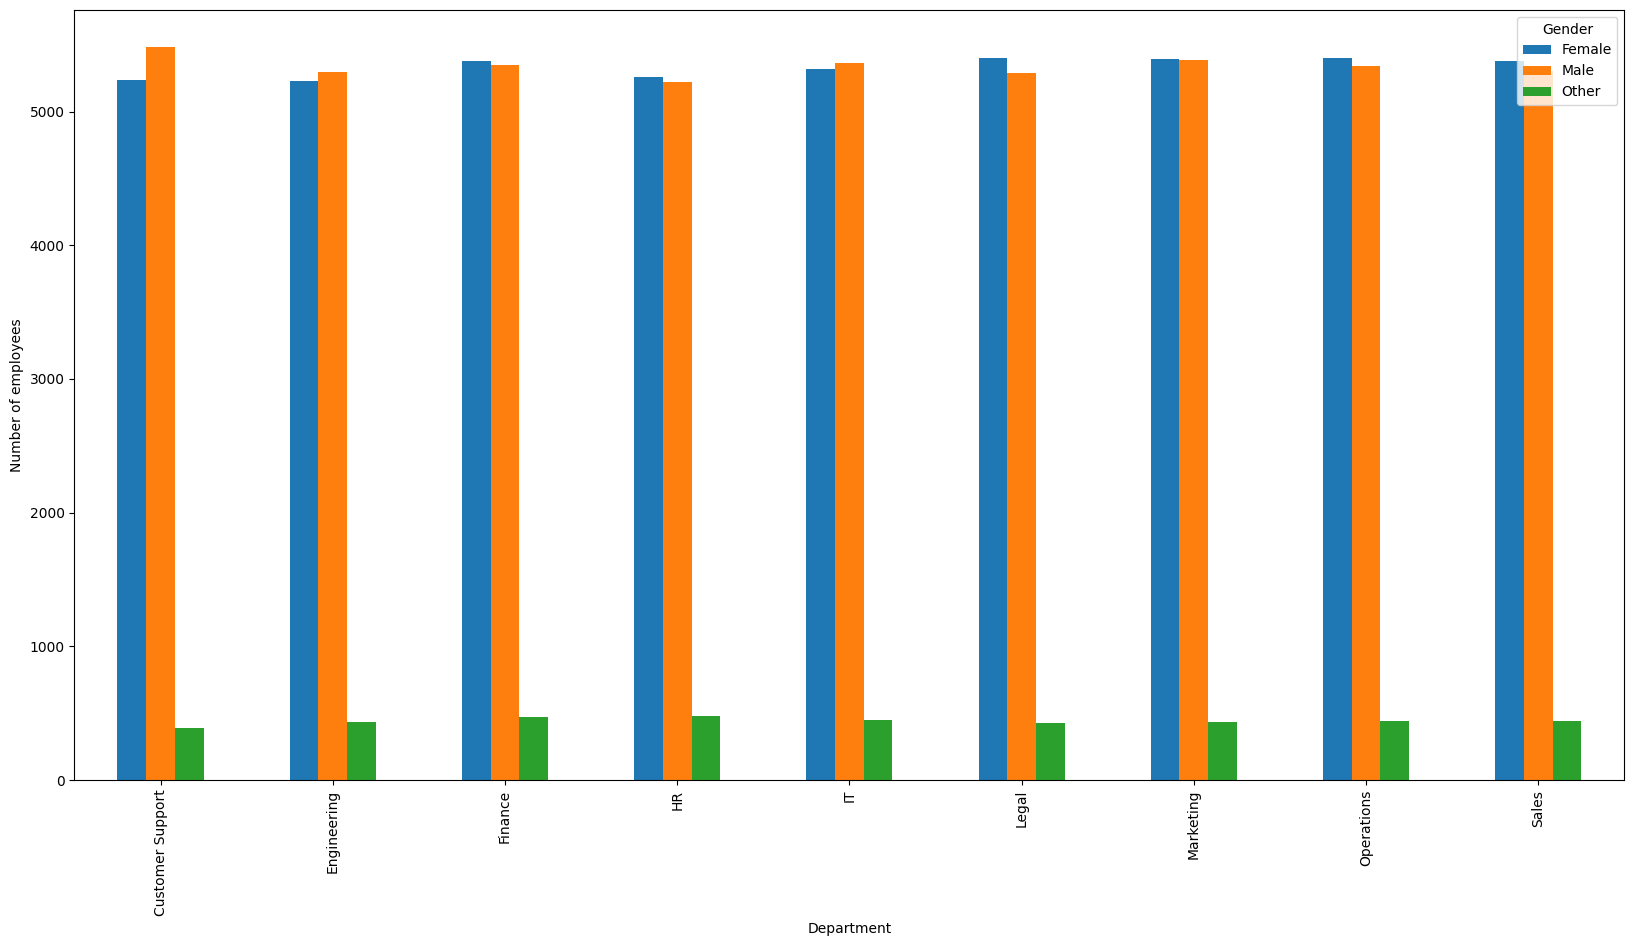

In [25]:
gender_distribution_over_departments_pivot=df.pivot_table(
    index='Department',
    columns='Gender',
    aggfunc='size'
)
gender_distribution_over_departments_pivot.plot(kind='bar', figsize=(20, 10),ylabel="Number of employees")

Conclusion:Male and female employees are fairly evenly distributed across all departments. However, the number of employees identified as "Other" is significantly lower in every department, indicating limited representation of non-binary or other gender identities in the workforce.

<h1>Gender distribution on job_title

<Axes: xlabel='Job_Title', ylabel='Number of employees'>

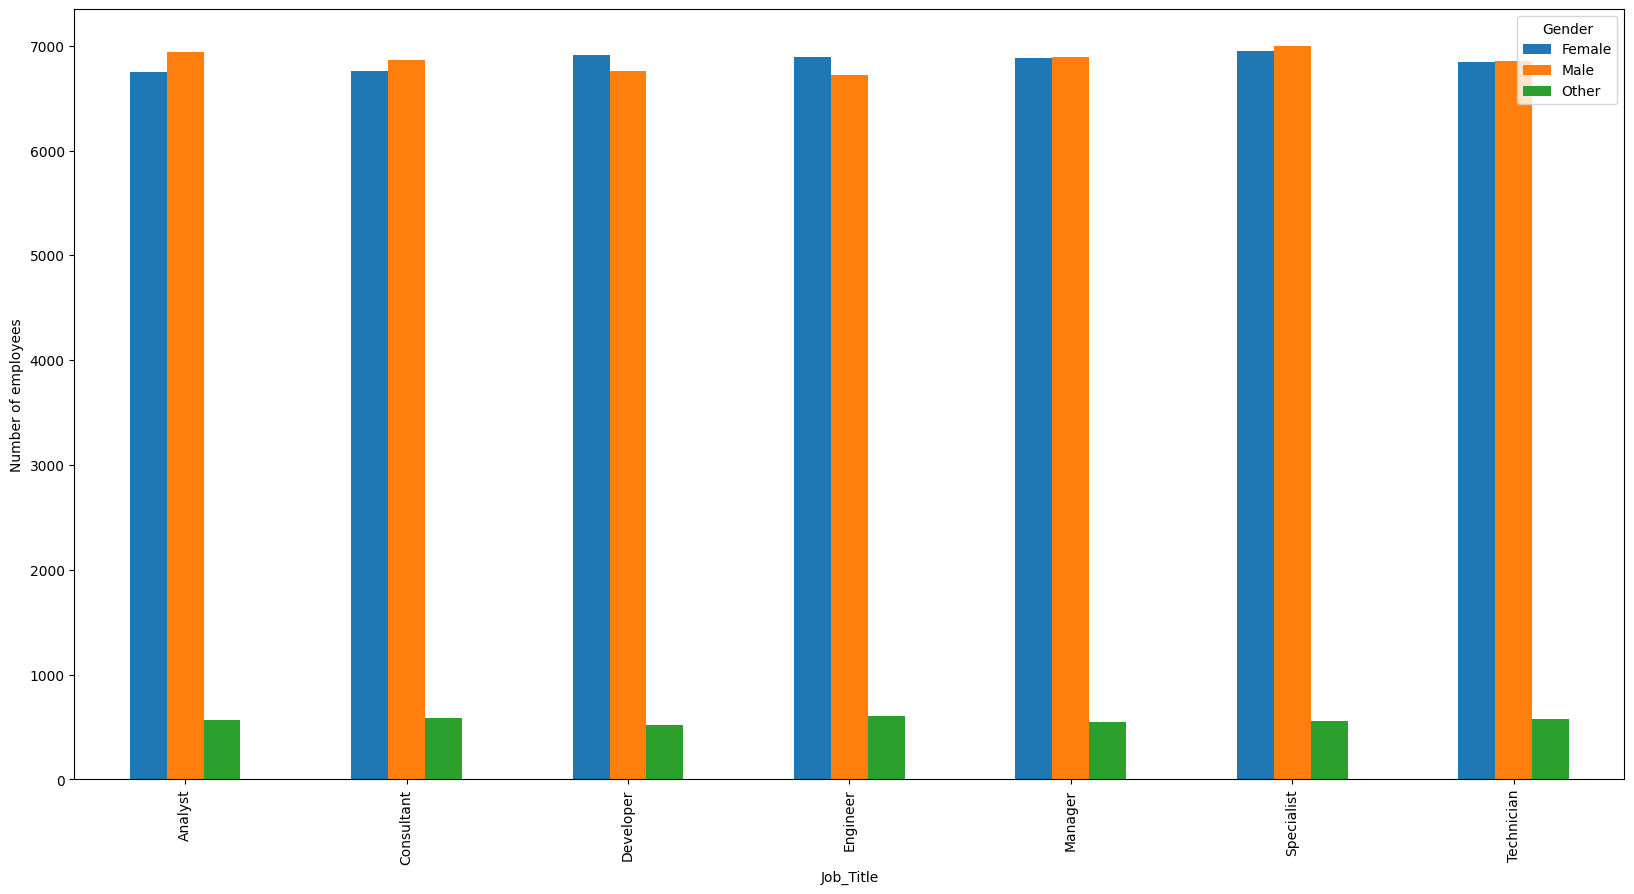

In [26]:
gender_distribution_over_departments_pivot=df.pivot_table(
    index='Job_Title',
    columns='Gender',
    aggfunc='size'
)
gender_distribution_over_departments_pivot.plot(kind='bar', figsize=(20, 10),ylabel="Number of employees")

<Axes: xlabel='Gender'>

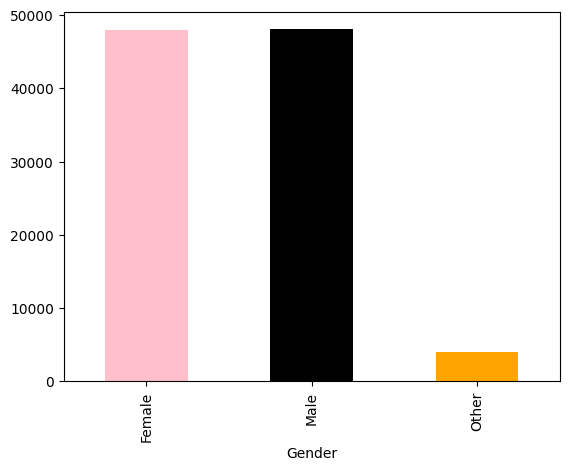

In [27]:
df.groupby('Gender').size().plot(kind='bar',color=['pink','black','orange'])

Conclusion:Across all job titles, male and female employees are nearly equally represented. However, the representation of employees in the "Other" gender category is consistently and significantly lower, highlighting a lack of diversity in gender beyond the binary categories

<h1>Is gender has any effect on performance

<Axes: xlabel='Gender', ylabel='Number of employees'>

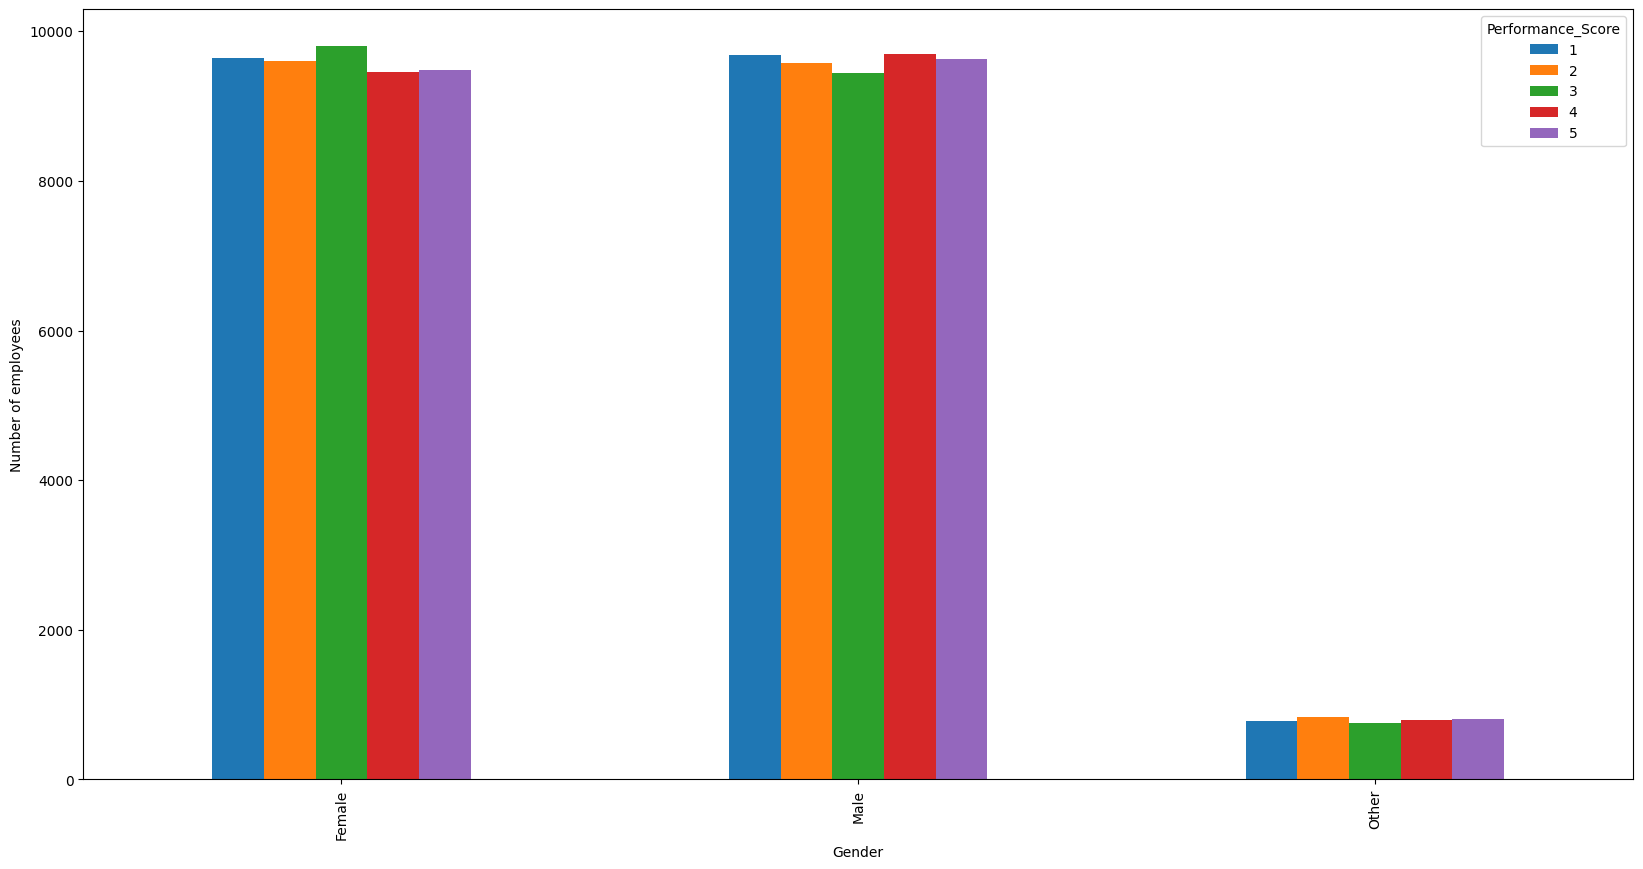

In [28]:
gender_distribution_over_departments_pivot=df.pivot_table(
    index='Gender',
    columns='Performance_Score',
    aggfunc='size'
)
gender_distribution_over_departments_pivot.plot(kind='bar', figsize=(20, 10),ylabel="Number of employees")

Based on the chart, the distribution of Performance_Score is notably consistent across Female, Male, and the smaller "Other" gender categories. This suggests that performance levels within the company are not visibly skewed by gender.

<h1>Gender and satisfaction level

In [29]:
def percentageaa(values):
    
    percentage=(values.size/100000.0)*100
    return percentage

<Axes: xlabel='Gender', ylabel='Percentage'>

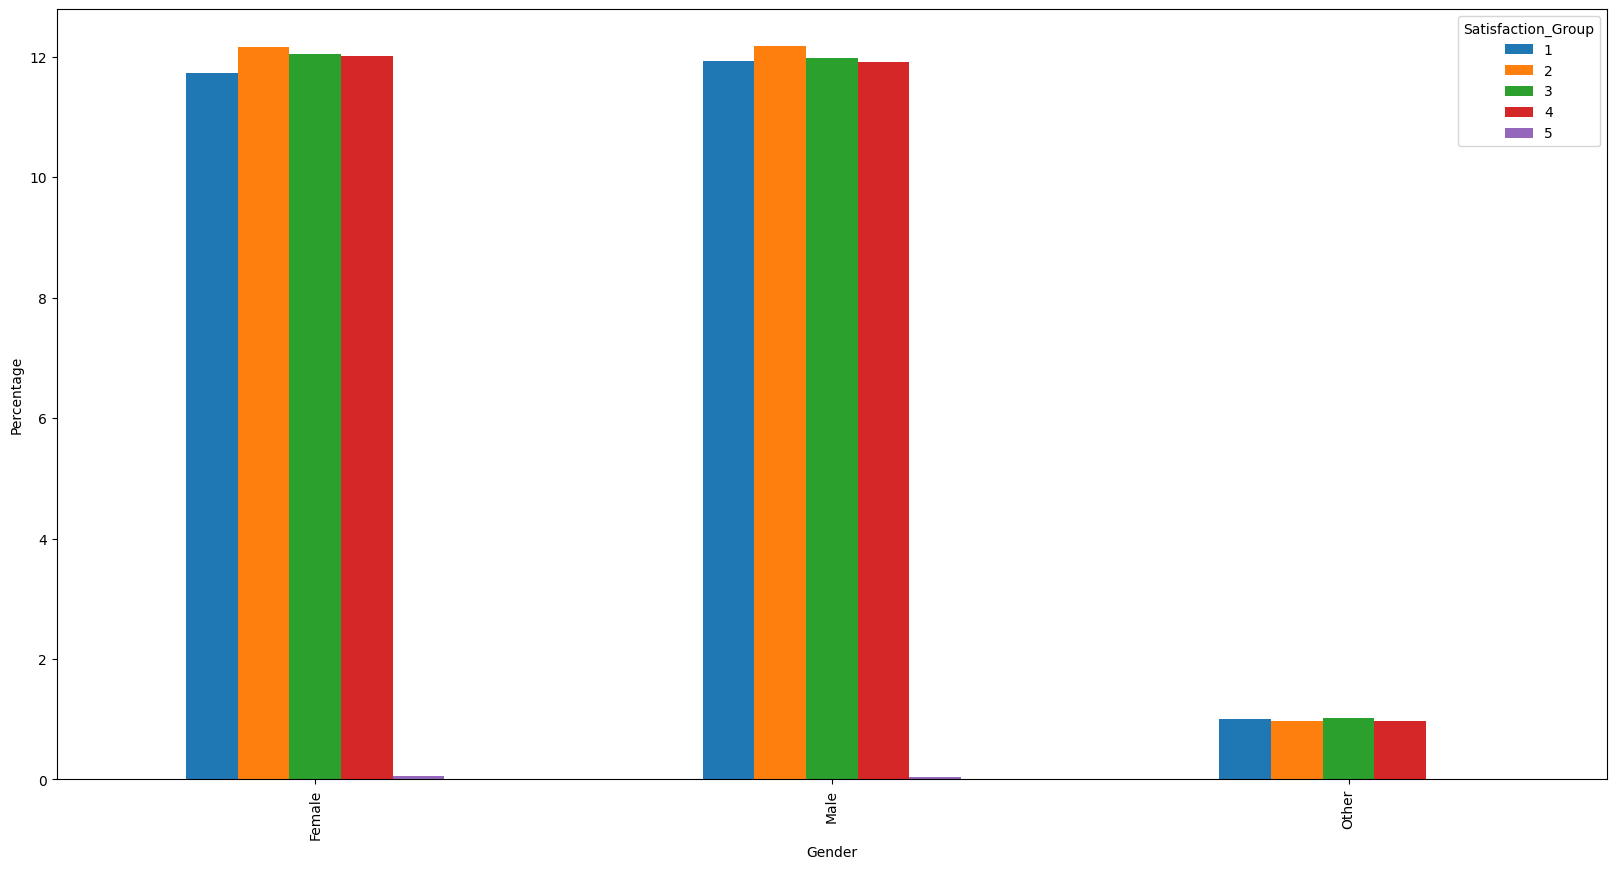

In [30]:
gender_distribution_over_departments_pivot=df.pivot_table(
    index='Gender',
    columns='Satisfaction_Group',
    values='Employee_ID',
    aggfunc=percentageaa
)
gender_distribution_over_departments_pivot.plot(kind='bar', figsize=(20, 10),ylabel="Percentage")

In [31]:

print(gender_distribution_over_departments_pivot)

Satisfaction_Group       1       2       3       4      5
Gender                                                   
Female              11.735  12.157  12.049  12.007  0.053
Male                11.921  12.173  11.970  11.918  0.049
Other                0.997   0.978   1.025   0.965  0.003



Based on the chart, the percentage distribution across different Satisfaction_Group levels is very similar for Female, Male, and "Other" gender categories. This suggests that employee satisfaction levels are not significantly differentiated by gender within the company.

<h1>How does employee Satisfaction_Group relate to the likelihood of an employee resigning?

Resigned            False  True 
Satisfaction_Group              
1                   22184   2469
2                   22768   2540
3                   22518   2526
4                   22427   2463
5                      93     12


<Axes: title={'center': 'satisfaction score vs resigned'}, xlabel='Satisfaction_Group'>

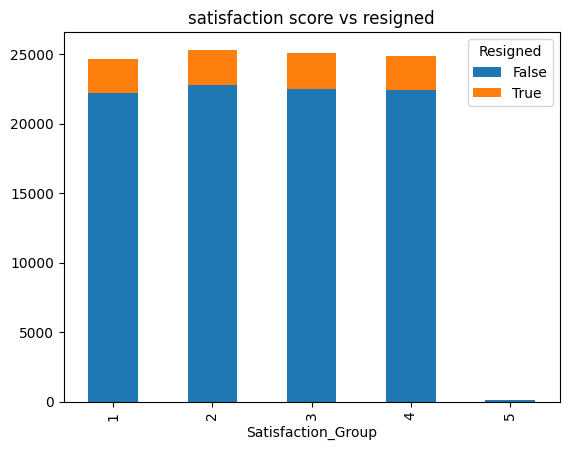

In [32]:
# 

satis_resign_pivot=df.pivot_table(
    index='Satisfaction_Group',
    columns='Resigned',
    aggfunc='size'
)
print(satis_resign_pivot)
satis_resign_pivot.plot(kind='bar',stacked='true',title='satisfaction score vs resigned')

Conclusion:The image suggests that people quit from both happy and less happy groups, without a clear pattern that unhappiness makes them quit more often.

<h1>Trainig hours and resignaton

Resigned        False  True 
Training_Hours              
0                 905    110
1                 875    102
2                 927    103
3                 889    103
4                 904     96
...               ...    ...
95                922     95
96                913    109
97                937    107
98                892     84
99                832     89

[100 rows x 2 columns]
Resigned            False      True 
Training_Hours                      
0               89.162562  10.837438
1               89.559877  10.440123
2               90.000000  10.000000
3               89.616935  10.383065
4               90.400000   9.600000
...                   ...        ...
95              90.658800   9.341200
96              89.334638  10.665362
97              89.750958  10.249042
98              91.393443   8.606557
99              90.336591   9.663409

[100 rows x 2 columns]


<Axes: title={'center': ' training hours vs resigned'}, xlabel='Training_Hours'>

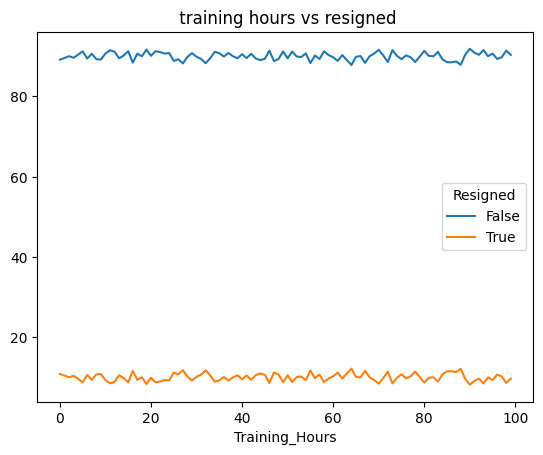

In [42]:
# 

training_resign_pivot=df.pivot_table(
    index=['Training_Hours'],
    columns='Resigned',
    aggfunc='size'
)
print(training_resign_pivot)

x=training_resign_pivot.div(training_resign_pivot.sum(1),axis=0)
x=x*100

print(x)
x.plot(title=' training hours vs resigned')


In [43]:
def my_quantiles(value):
    u=value.quantile(.9)
    l=value.quantile(.1)
    filter=value[value>=l&value<=u]
    return filter


Conclusion: The graph shows that the number of employees who resigned (True) remains consistently low across all levels of Training_Hours, while the number of retained employees (False) stays high, indicating training hours don't significantly predict resignation.

<h1>Overtime vs Sickdays

In [41]:
sick_overtime_pivot=df.pivot_table(
    index='Overtime_Hours',
    columns='Sick_Days',
    values='Employee_ID',
    aggfunc='size'
)
print(sick_overtime_pivot)
# sick_overtime_pivot.plot(marker='o', figsize=(20, 10))

Sick_Days        0    1    2    3    4    5    6    7    8    9    10   11  \
Overtime_Hours                                                               
0               216  211  225  226  220  220  224  228  228  228  244  209   
1               224  243  217  223  230  233  204  212  214  229  224  234   
2               216  196  245  211  251  213  229  222  229  195  188  240   
3               230  241  240  215  232  191  233  221  197  211  240  211   
4               215  202  224  232  206  190  237  222  251  216  207  219   
5               204  231  219  253  214  247  240  224  215  221  231  211   
6               242  232  207  217  196  236  233  237  205  202  209  217   
7               233  242  199  210  208  227  198  228  220  233  226  223   
8               226  229  253  240  221  225  230  224  229  223  194  216   
9               192  223  204  231  230  200  233  232  212  213  227  235   
10              203  216  229  223  212  210  215  207  191  249

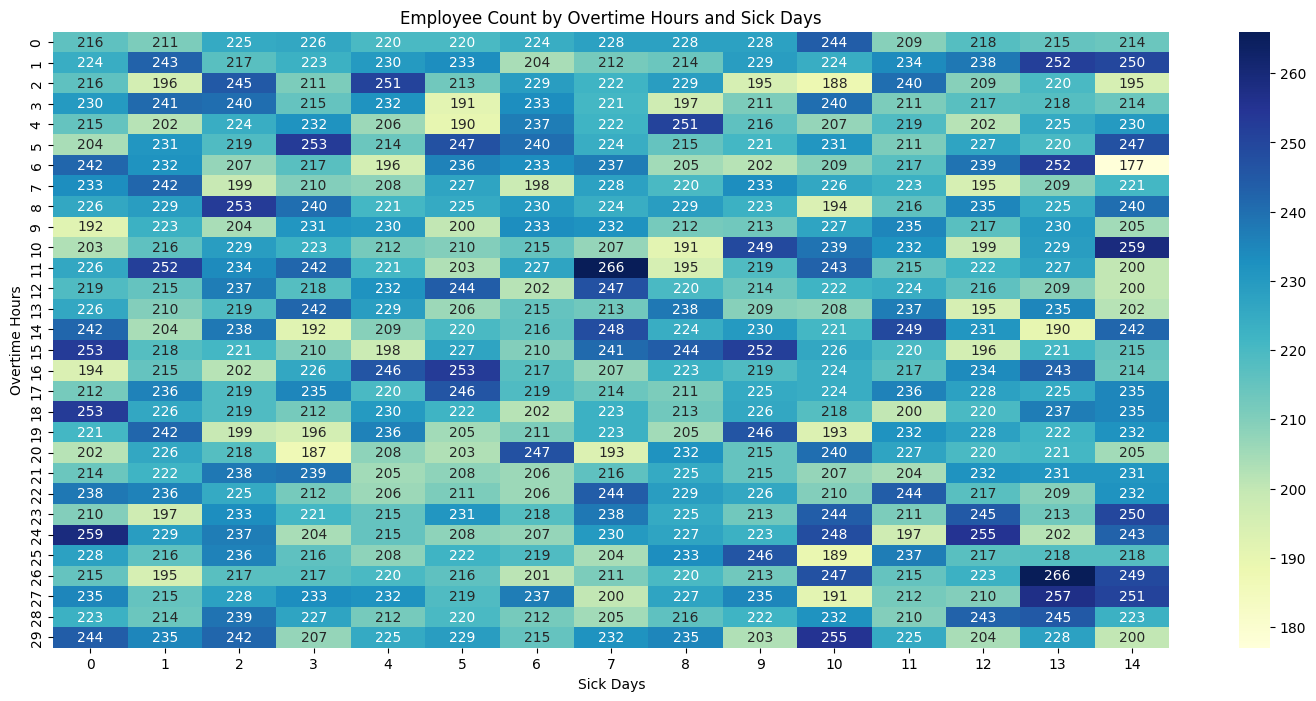

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.heatmap(sick_overtime_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Employee Count by Overtime Hours and Sick Days")
plt.xlabel("Sick Days")
plt.ylabel("Overtime Hours")
plt.show()


The heatmap indicates that employee counts are fairly evenly distributed across all combinations of overtime hours and sick days, with no major concentrations in any specific high or low usage patterns for either metric.

<h1>Age vs Promotion

<Axes: title={'center': 'Age'}, xlabel='Promotions'>

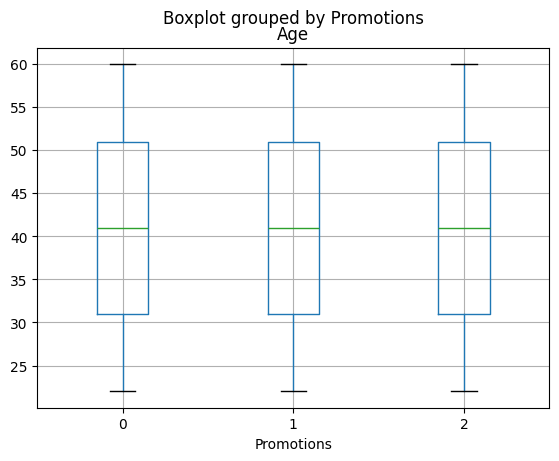

In [36]:
df.boxplot(column='Age', by='Promotions')

The boxplot indicates that the age distribution is very similar across all promotion groups, suggesting age is not a significant factor influencing promotions.

<h1> Project handled vs salary

<Axes: title={'center': 'Monthly_Salary'}, xlabel='Project_Bins'>

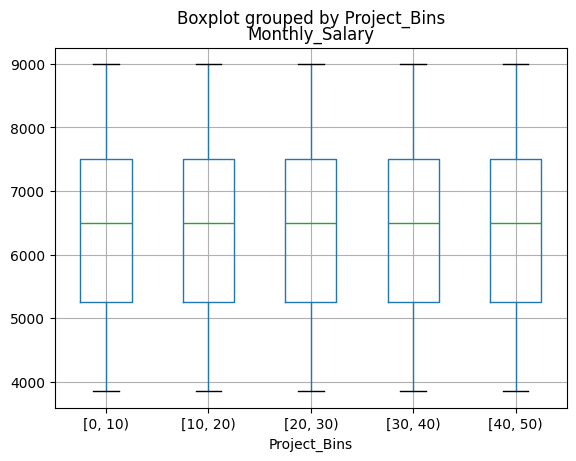

In [37]:
df['Project_Bins'] = pd.cut(df['Projects_Handled'], bins=range(0, df['Projects_Handled'].max() + 10, 10), right=False)

df.boxplot(column='Monthly_Salary', by='Project_Bins')


The boxplot reveals highly consistent monthly salary distributions across all "Project_Bins" categories, suggesting no significant relationship between project count bins and monthly salary.

<h1>Team size vs number of project

In [38]:
print(df.groupby('Project_Bins')['Team_Size'].describe())

                count       mean       std  min  25%   50%   75%   max
Project_Bins                                                          
[0, 10)       20202.0   9.936640  5.510748  1.0  5.0  10.0  15.0  19.0
[10, 20)      20234.0  10.043195  5.502534  1.0  5.0  10.0  15.0  19.0
[20, 30)      19631.0  10.039326  5.471361  1.0  5.0  10.0  15.0  19.0
[30, 40)      20025.0  10.008040  5.507358  1.0  5.0  10.0  15.0  19.0
[40, 50)      19908.0  10.041642  5.483965  1.0  5.0  10.0  15.0  19.0


C:\Users\rojiv\AppData\Local\Temp\ipykernel_4800\1643763200.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Project_Bins')['Team_Size'].describe())


The analysis of team size based on the number of projects handled reveals a consistent pattern: regardless of whether employees are managing a low (0-10) or high (41-50) volume of projects, the average team size remains consistently around 10 members. This suggests that our current team structuring tends to maintain similar sizes across various project loads, with a typical range of 1 to 19 members per team.

<h1>Team size vs Department

In [39]:

print(df.groupby('Department')['Team_Size'].describe())

                    count       mean       std  min  25%   50%   75%   max
Department                                                                
Customer Support  11116.0   9.991274  5.500077  1.0  5.0  10.0  15.0  19.0
Engineering       10956.0   9.967050  5.477835  1.0  5.0  10.0  15.0  19.0
Finance           11200.0  10.103750  5.518620  1.0  5.0  10.0  15.0  19.0
HR                10960.0  10.012318  5.482266  1.0  5.0  10.0  15.0  19.0
IT                11131.0   9.974036  5.492865  1.0  5.0  10.0  15.0  19.0
Legal             11118.0  10.068358  5.522237  1.0  5.0  10.0  15.0  19.0
Marketing         11216.0  10.022200  5.488491  1.0  5.0  10.0  15.0  19.0
Operations        11181.0  10.022807  5.483829  1.0  5.0  10.0  15.0  19.0
Sales             11122.0   9.958820  5.492056  1.0  5.0  10.0  15.0  19.0


Across all departments, the average team size remains remarkably consistent at approximately 10 members, with similar distributions, indicating a standardized approach to team structuring throughout the organization.

Final conclusion:The dataset is clean with no missing values, duplicates, or format issues. A strong correlation exists between Performance_Score and Monthly_Salary, indicating high-performing employees are paid more across all departments. However, derived metrics like Underpaid and Satisfaction_Group do not show meaningful correlations. Education level does not have a consistent relationship with salary, and age distribution is uniform across departments, averaging around 41 years. Salary progression shows no clear trend with tenure and varies by department, suggesting role-specific growth policies. Resignation rates are steady at around 10% regardless of years of service, and satisfaction levels do not significantly impact resignation likelihood. Hiring patterns are consistent over time, with peaks in October 2021 and August 2022, while 2024 data appears partial. Gender-based salary differences are minimal, and male and female employees are evenly distributed across departments and roles, though "Other" gender representation is low. Performance and satisfaction levels are similar across all gender categories. Training hours do not predict resignation, and overtime or sick days show no clear clustering patterns. Promotions are not influenced by age. Salary does not vary significantly with project count, and average team size remains consistent (~10 members) across different project loads and departments, reflecting a standardized team structure across the organization.

In [40]:
df.describe(include='object')

,Department,Gender,Job_Title,Education_Level
count,100000,100000,100000,100000
unique,9,3,7,4
top,Marketing,Male,Specialist,Bachelor
freq,11216,48031,14507,50041
